In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0
tensorboard2.1.0
seaborn0.10.1
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12982321421285215911,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6588305899
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4593407475284867892
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['cats', 'dogs']

In [3]:

cat_image = train_path + '/cats/' + os.listdir(train_path + '/cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(280, 300, 3)

'../input/kaggle-catsdogs\\train/dogs/dog.1001.jpg'

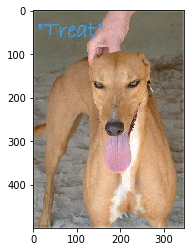

In [4]:
dog_image = train_path + '/dogs/' + os.listdir(train_path + '/dogs/')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
# len(os.listdir(train_path + '/dogs'))

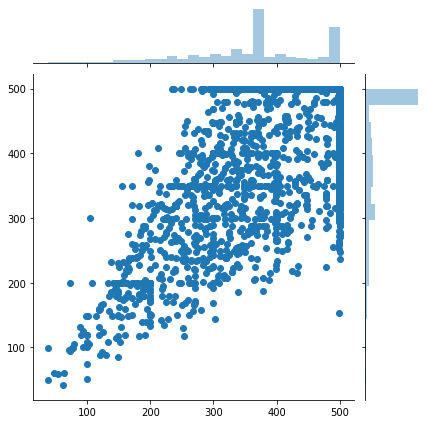

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/dogs/'):
    img = imread(test_path+'/dogs/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
# np.mean(dim2)
# imread(dog_image).shape
image_shape =(300, 300, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_gen = ImageDataGenerator(rescale =1./255)


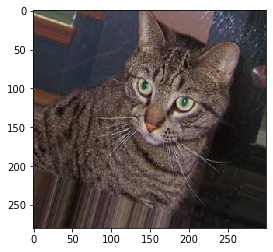

In [9]:
plt.imshow(imread(cat_image))
cat_image
plt.imshow(train_gen.random_transform(imread(cat_image)))

In [10]:
# image_gen.flow_from_directory(train_path)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=32

train_image_gen= train_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical')

test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical')

train_image_gen.class_indices

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


# import keras_resnet.models
# import keras

# x = keras.layers.Input(image_shape)
# base_model = keras_resnet.models.ResNet50(x, classes=1)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())


# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, BatchNormalization
# from keras.models import Sequential,Model,load_model
# from keras import applications




# model = Sequential()

# model.add(applications.ResNet50(include_top=False, pooling=None, input_shape=image_shape))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False



# base_model = applications.ResNet152V2(weights= None, include_top=False, input_shape= image_shape)
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation= 'sigmoid')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(lr=0.0001)
# opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

results = model.fit(train_image_gen, epochs=2, verbose = 1, validation_data=test_image_gen, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 157 steps
Epoch 1/2
  1/625 [..............................] - ETA: 1:51:41WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-12-978b235108b8>:77) ]] [Op:__inference_distributed_function_1370]

Function call stack:
distributed_function


In [ ]:
model.summary()

In [ ]:
model.save('catsdogs-categorical')

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(results.history).to_csv('history_catsdogs_categorical_small.csv',index=False)
history_dict = pd.read_csv("history_catsdogs_categorical.csv")